Da es häufig der Fall ist, dass wir nicht genug Daten haben,
verwenden wir Data Augmentation. Hierbei nehmen wir bereits existierende
Daten und verändern diese z. B. durch Spiegeln, Drehen, Zoomen, sodass
diese als „neue“ Daten verwendet werden können. Das hilft unter anderem gegen Overfitting.

Wir verwenden wieder den `PetImages` Datensatz und erzeugen uns ein paar neue Bilder
von Hunden und Katzen.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
def plot_images(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [3]:
generator = ImageDataGenerator(rotation_range=10,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               shear_range=0.15,
                               zoom_range=0.1,
                               channel_shift_range=10.,
                               horizontal_flip=True)

In [4]:
chosen_image = os.path.join('data/PetImages/train/Dog',
                            random.choice(os.listdir('data/PetImages/train/Dog')))

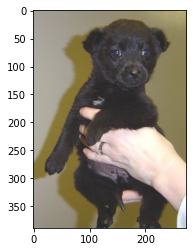

In [5]:
image = np.expand_dims(plt.imread(chosen_image), 0)
plt.imshow(image[0])

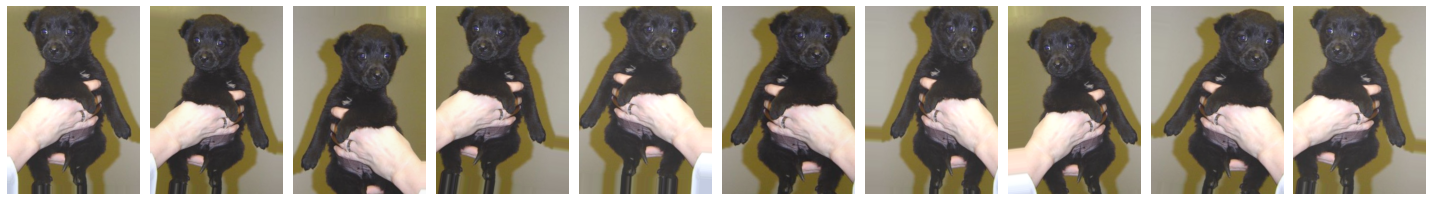

In [6]:
augmented_iterator = generator.flow(image)
augmented_images = [next(augmented_iterator)[0].astype(np.uint8) for i in range(10)]
plot_images(augmented_images)

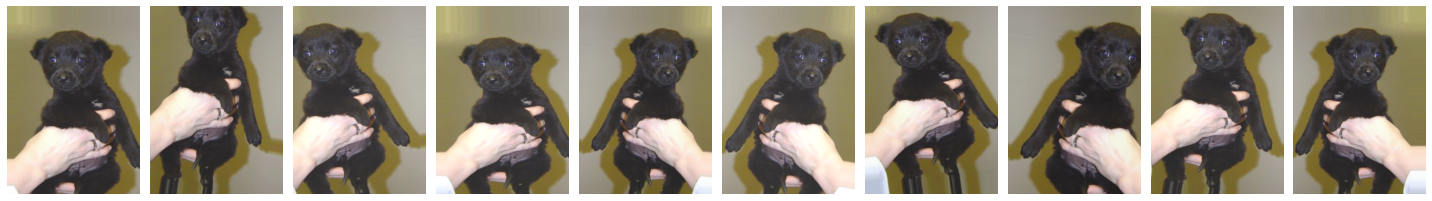

In [7]:
if not os.path.isdir('data/PetImages/augmented'):
    os.makedirs('data/PetImages/augmented')

augmented_iterator_save = generator.flow(image, save_to_dir='data/PetImages/augmented', save_prefix='aug-image-', save_format='jpg')
augmented_images_save = [next(augmented_iterator_save)[0].astype(np.uint8) for i in range(10)]
plot_images(augmented_images_save)